# QUESTION 5

Importing packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Changing Jupyter notebook settings to view all columns

In [2]:
pd.set_option("display.max_columns", None)

Importing the main dataset

In [3]:
#Using the pandas read_csv() function to import the dataset
full_dataset = pd.read_csv("../datasets/dataset_full_new.csv")
full_dataset

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,0,0,0,0,0,0
1,1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19,0,0,0,0,0,0,0
2,2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11,0,0,0,0,0,0,0
3,3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10,0,0,0,0,0,0,0
4,4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14279052,7453210,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,N670DN,111.0,91.0,80.0,13.0,-7.0,MCO,ATL,403,14,17,0,0,0,0,0,0,0
14279053,7453211,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,N829MH,248.0,254.0,221.0,5.0,11.0,ATL,SLC,1589,6,21,0,0,0,0,0,0,0
14279054,7453212,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,N623DL,266.0,250.0,233.0,15.0,-1.0,LAX,ATL,1946,14,19,0,0,0,0,15,0,0
14279055,7453213,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,N970DL,125.0,127.0,100.0,36.0,38.0,DFW,ATL,732,11,14,0,0,0,0,0,0,36


Removing the unnamed column as it adds no value to our analysis

In [4]:
# To remove the unnamed column we use the iloc function to select all rows and columns except the first column (Unnamed column)
full_dataset = full_dataset.iloc[:, 1:]
full_dataset

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19,0,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11,0,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10,0,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14279052,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,N670DN,111.0,91.0,80.0,13.0,-7.0,MCO,ATL,403,14,17,0,0,0,0,0,0,0
14279053,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,N829MH,248.0,254.0,221.0,5.0,11.0,ATL,SLC,1589,6,21,0,0,0,0,0,0,0
14279054,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,N623DL,266.0,250.0,233.0,15.0,-1.0,LAX,ATL,1946,14,19,0,0,0,0,15,0,0
14279055,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,N970DL,125.0,127.0,100.0,36.0,38.0,DFW,ATL,732,11,14,0,0,0,0,0,0,36


Plotting the correlation matrix to identify which variables are correlated to help select features and avoid multicolinearity

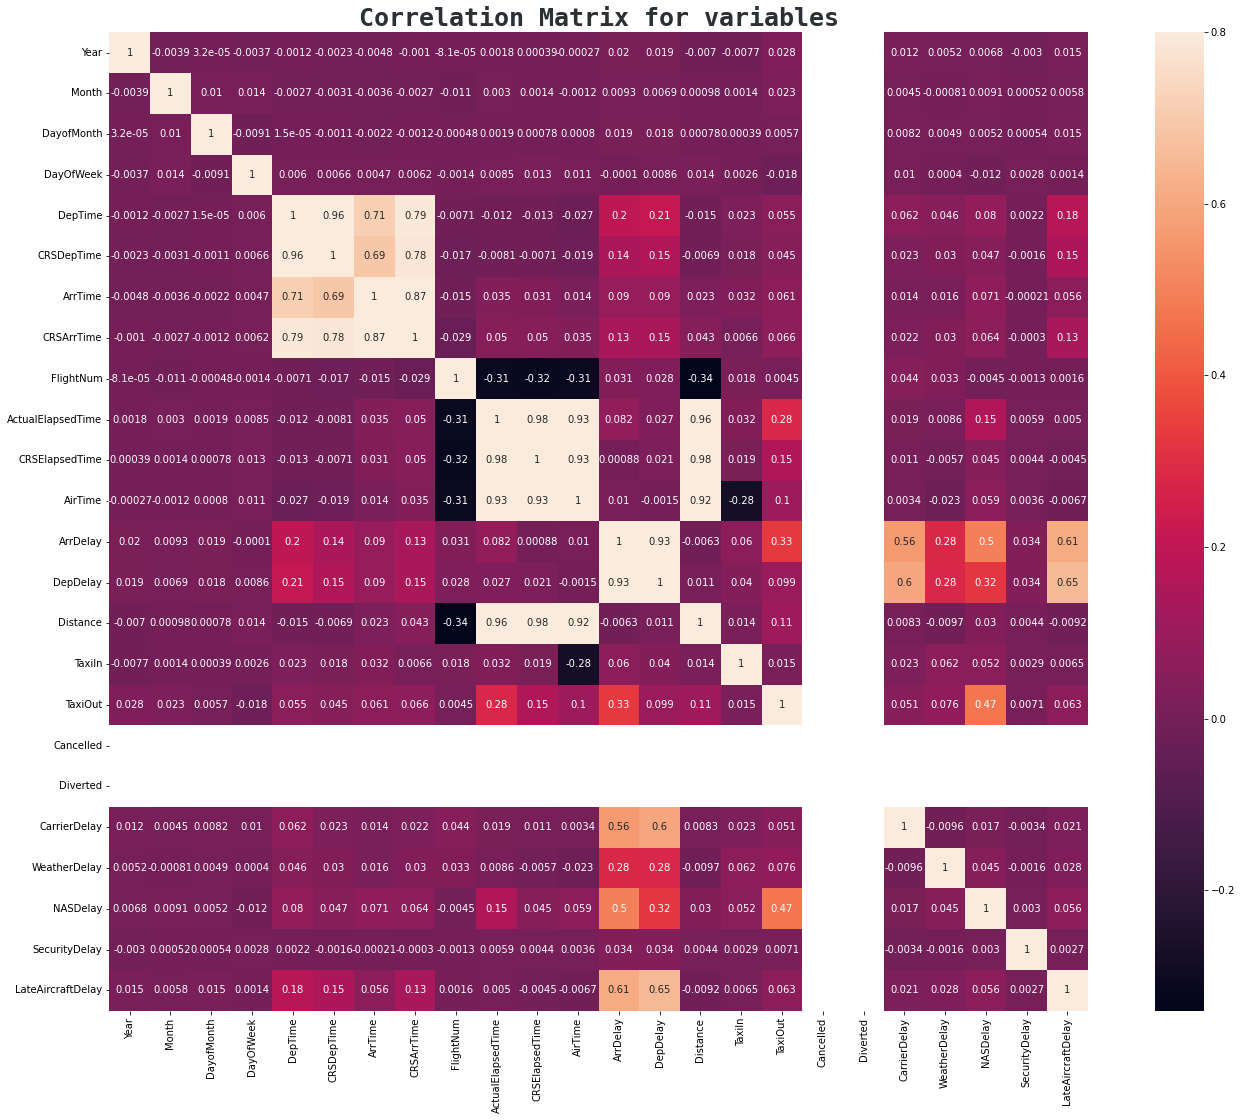

In [5]:
#Making a pearson Correlation matrix for the variables in the full_dataset using an sns heatmap
correlation_matrix = full_dataset.corr('pearson')

f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(correlation_matrix, annot=True, vmax=.8, square=True)
ax.set_title("Correlation Matrix for variables",
                color='#2c2f33',
                family = 'monospace',
                size = 25,
                weight = 'bold')
plt.show()


Finding the value counts of Diverted to see whether we can include it in the model

In [6]:
#Did not choose diverted as feature since it was all zeros
full_dataset.Diverted.value_counts()

0    14279057
Name: Diverted, dtype: int64

Finding the value counts of Cancelled to see whether we can include it in the model

In [7]:
#Did not choose cancelled as feature since it was all zeros
full_dataset.Cancelled.value_counts()

0    14279057
Name: Cancelled, dtype: int64

Importing the plane dataset

In [8]:
#Using the pandas read_csv() function to import the dataset
plane_dataset = pd.read_csv("../datasets/plane-data.csv")
plane_dataset

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998


Filtering out the tailnum and year column from the plane_dataset

In [9]:
plane_dataset = plane_dataset.filter(['tailnum', 'year'], axis = 1)
plane_dataset

,tailnum,year
0,N050AA,NaN
1,N051AA,NaN
2,N052AA,NaN
3,N054AA,NaN
4,N055AA,NaN
...,...,...
5024,N997DL,1992
5025,N998AT,2002
5026,N998DL,1992
5027,N999CA,1998


Renaming the plane_dataset tail number column to match that of the full_dataset tail number column in order to facilitate merging

In [10]:
# Renaming 'tailnum' to 'TailNum' in plane_dataset
plane_dataset.rename(columns={'tailnum':'TailNum'}, inplace=True)

# Renaming 'year' to 'PlaneManufactureYear' in plane_dataset
plane_dataset.rename(columns={'year':'PlaneManufactureYear'}, inplace=True)
plane_dataset

,TailNum,PlaneManufactureYear
0,N050AA,NaN
1,N051AA,NaN
2,N052AA,NaN
3,N054AA,NaN
4,N055AA,NaN
...,...,...
5024,N997DL,1992
5025,N998AT,2002
5026,N998DL,1992
5027,N999CA,1998


Merging plane_dataset_1 with the full_dataset to find the PlaneManufactureYear of each flight in the full_dataset

In [11]:
# Using the pandas merge() function to perform an inner join merge between full_dataset and plane_dataset based on TailNum
full_dataset = pd.merge(full_dataset, plane_dataset, on = ['TailNum'])
full_dataset

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,PlaneManufactureYear
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,0,0,0,0,0,0,1999
1,2006,1,11,3,1913.0,1912,2326.0,2331,US,9,N657AW,193.0,199.0,172.0,-5.0,1.0,PHX,ORD,1440,5,16,0,0,0,0,0,0,0,1999
2,2006,1,12,4,2355.0,2359,121.0,131,US,374,N657AW,86.0,92.0,58.0,-10.0,-4.0,LAS,OAK,407,5,23,0,0,0,0,0,0,0,1999
3,2006,1,12,4,724.0,729,1017.0,1019,US,182,N657AW,233.0,230.0,200.0,-2.0,-5.0,ORD,PHX,1440,24,9,0,0,0,0,0,0,0,1999
4,2006,1,12,4,1305.0,1300,1848.0,1850,US,570,N657AW,223.0,230.0,207.0,-2.0,5.0,PHX,TPA,1788,5,11,0,0,0,0,0,0,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12621068,2007,12,30,7,2003.0,2010,25.0,2345,B6,649,N665JB,442.0,395.0,376.0,40.0,-7.0,JFK,SFO,2586,14,52,0,0,0,0,40,0,0,2007
12621069,2007,12,31,1,1943.0,1940,2120.0,2110,B6,5,N665JB,97.0,90.0,67.0,10.0,3.0,BUF,JFK,301,16,14,0,0,0,0,0,0,0,2007
12621070,2007,12,31,1,1716.0,1720,1858.0,1901,B6,6,N665JB,102.0,101.0,61.0,-3.0,-4.0,JFK,BUF,301,4,37,0,0,0,0,0,0,0,2007
12621071,2007,12,31,1,2155.0,2150,59.0,100,B6,809,N665JB,184.0,190.0,165.0,-1.0,5.0,JFK,FLL,1069,4,15,0,0,0,0,0,0,0,2007


Filtering the full_dataset to only keep the necessary variables that are required in the model

In [12]:
# Filtering out the required columns
full_dataset_1 = full_dataset.filter(['Year', 
                                      'Month', 
                                      'DayofMonth', 
                                      'DayOfWeek', 
                                      'CRSDepTime', 
                                      'ArrDelay', 
                                      'DepDelay', 
                                      'Origin', 
                                      'Dest',
                                      'PlaneManufactureYear'], axis=1)
full_dataset_1.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,ArrDelay,DepDelay,Origin,Dest,PlaneManufactureYear
0,2006,1,11,3,745,6.0,-2.0,ATL,PHX,1999
1,2006,1,11,3,1912,-5.0,1.0,PHX,ORD,1999
2,2006,1,12,4,2359,-10.0,-4.0,LAS,OAK,1999
3,2006,1,12,4,729,-2.0,-5.0,ORD,PHX,1999
4,2006,1,12,4,1300,-2.0,5.0,PHX,TPA,1999


Checking for null values in full_dataset_1

In [13]:
pd.isnull(full_dataset_1).sum()

Year                         0
Month                        0
DayofMonth                   0
DayOfWeek                    0
CRSDepTime                   0
ArrDelay                     0
DepDelay                     0
Origin                       0
Dest                         0
PlaneManufactureYear    692721
dtype: int64

Removing null values from plane_dataset

In [14]:
# Removing the null values from PlaneManufactureYear column using the pandas notnull() function
full_dataset_1 = full_dataset_1[pd.notnull(full_dataset_1['PlaneManufactureYear'])]

Checking if removal was successful

In [15]:
pd.isnull(full_dataset_1).sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
CRSDepTime              0
ArrDelay                0
DepDelay                0
Origin                  0
Dest                    0
PlaneManufactureYear    0
dtype: int64

Checking the dtypes of each column in full_dataset_1

In [16]:
full_dataset_1.dtypes

Year                      int64
Month                     int64
DayofMonth                int64
DayOfWeek                 int64
CRSDepTime                int64
ArrDelay                float64
DepDelay                float64
Origin                   object
Dest                     object
PlaneManufactureYear     object
dtype: object

Since the PlaneManufactureYear is an object we check that column for non-numerical values and unfeasible year values

In [17]:
#Checking the value counts for the PlaneManufactureYear column in the full_dataset_1
full_dataset_1['PlaneManufactureYear'].value_counts()

# We found that there are years named 'None' and '0000'

2001    1104366
2002     889005
2000     873930
2003     842526
1999     839318
2004     735168
1998     676997
2005     593303
1988     386807
1996     386619
1991     368946
1997     356769
None     351275
1992     339206
1990     338796
1987     334172
2006     320633
1994     314060
1995     307708
1989     290669
1985     256048
1993     255093
1986     229929
2007      89046
1984      66851
1968      65140
1983      43192
1967      36487
1969      34318
1979      29244
1978      25539
1975      24809
1976      24764
1980      20538
1977      13625
1982      10956
0000      10422
1973       7902
1970       5812
1959       5010
1966       3205
1963       3173
1974       3151
1962       2818
1964       2793
1971       2784
1965       2550
1957       1793
1956        556
1972        531
Name: PlaneManufactureYear, dtype: int64

Removing the '0000' and 'None' values from the PlaneManufactureYear column in the full_dataset_1

In [18]:
# Using the pandas drop() function to drop a row if it either contains '0000' or 'None' in the PlaneManufactureYear column of the full_dataset_1
full_dataset_1.drop(full_dataset_1[(full_dataset_1['PlaneManufactureYear'] == '0000') | (full_dataset_1['PlaneManufactureYear'] == 'None') ].index, inplace = True)
full_dataset_1

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,ArrDelay,DepDelay,Origin,Dest,PlaneManufactureYear
0,2006,1,11,3,745,6.0,-2.0,ATL,PHX,1999
1,2006,1,11,3,1912,-5.0,1.0,PHX,ORD,1999
2,2006,1,12,4,2359,-10.0,-4.0,LAS,OAK,1999
3,2006,1,12,4,729,-2.0,-5.0,ORD,PHX,1999
4,2006,1,12,4,1300,-2.0,5.0,PHX,TPA,1999
...,...,...,...,...,...,...,...,...,...,...
12621068,2007,12,30,7,2010,40.0,-7.0,JFK,SFO,2007
12621069,2007,12,31,1,1940,10.0,3.0,BUF,JFK,2007
12621070,2007,12,31,1,1720,-3.0,-4.0,JFK,BUF,2007
12621071,2007,12,31,1,2150,-1.0,5.0,JFK,FLL,2007


Confirming whether '0000' and 'None' year value containing rows were removed

In [19]:
full_dataset_1['PlaneManufactureYear'].value_counts()

2001    1104366
2002     889005
2000     873930
2003     842526
1999     839318
2004     735168
1998     676997
2005     593303
1988     386807
1996     386619
1991     368946
1997     356769
1992     339206
1990     338796
1987     334172
2006     320633
1994     314060
1995     307708
1989     290669
1985     256048
1993     255093
1986     229929
2007      89046
1984      66851
1968      65140
1983      43192
1967      36487
1969      34318
1979      29244
1978      25539
1975      24809
1976      24764
1980      20538
1977      13625
1982      10956
1973       7902
1970       5812
1959       5010
1966       3205
1963       3173
1974       3151
1962       2818
1964       2793
1971       2784
1965       2550
1957       1793
1956        556
1972        531
Name: PlaneManufactureYear, dtype: int64

Converting the numerical values in months to its corresponding month name

In [20]:
# Using the .loc() function to replace each integer month value with a string containing its relevant month name
full_dataset_1.loc[full_dataset_1['Month'] == 1, 'Month'] = 'January'
full_dataset_1.loc[full_dataset_1['Month'] == 2, 'Month'] = 'February'
full_dataset_1.loc[full_dataset_1['Month'] == 3, 'Month'] = 'March'
full_dataset_1.loc[full_dataset_1['Month'] == 4, 'Month'] = 'April'
full_dataset_1.loc[full_dataset_1['Month'] == 5, 'Month'] = 'May'
full_dataset_1.loc[full_dataset_1['Month'] == 6, 'Month'] = 'June'
full_dataset_1.loc[full_dataset_1['Month'] == 7, 'Month'] = 'July'
full_dataset_1.loc[full_dataset_1['Month'] == 8, 'Month'] = 'August'
full_dataset_1.loc[full_dataset_1['Month'] == 9, 'Month'] = 'September'
full_dataset_1.loc[full_dataset_1['Month'] == 10, 'Month'] = 'October'
full_dataset_1.loc[full_dataset_1['Month'] == 11, 'Month'] = 'November'
full_dataset_1.loc[full_dataset_1['Month'] == 12, 'Month'] = 'December'
full_dataset_1.Month.value_counts()

August       1032872
July         1016593
October      1006783
May           988035
March         983430
June          977072
December      976093
November      971413
September     958149
April         954985
January       872860
February      828370
Name: Month, dtype: int64

Creating categorical variables of the time-based data by converting them from integer type to character type

In [21]:
#Converting Month to a string type object
full_dataset_1['Month'] = full_dataset_1['Month'].astype(str)

#Converting Year to a string type object
full_dataset_1['Year'] = full_dataset_1['Year'].astype(str)

#Converting DaysofMonth to a string type object
full_dataset_1['DayofMonth'] = full_dataset_1['DayofMonth'].astype(str)

#Converting DaysOfWeek to a string type object
full_dataset_1['DayOfWeek'] = full_dataset_1['DayOfWeek'].astype(str)


full_dataset_1.dtypes

Year                     object
Month                    object
DayofMonth               object
DayOfWeek                object
CRSDepTime                int64
ArrDelay                float64
DepDelay                float64
Origin                   object
Dest                     object
PlaneManufactureYear     object
dtype: object

Creating a categorical variable for the model to predict called ArrDelayStatus

In [22]:
# If the ArrDelay is greater than zero the np.where() function marks the ArrDelayStatus as 'Present'
# If the ArrDelay is less than or equal to zero the np.where() function marks the ArrDelayStatus as 'Absent'
full_dataset_1['ArrDelayStatus'] = np.where(full_dataset_1['ArrDelay'] > 0 , 'Present', 'Absent')
full_dataset_1

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,ArrDelay,DepDelay,Origin,Dest,PlaneManufactureYear,ArrDelayStatus
0,2006,January,11,3,745,6.0,-2.0,ATL,PHX,1999,Present
1,2006,January,11,3,1912,-5.0,1.0,PHX,ORD,1999,Absent
2,2006,January,12,4,2359,-10.0,-4.0,LAS,OAK,1999,Absent
3,2006,January,12,4,729,-2.0,-5.0,ORD,PHX,1999,Absent
4,2006,January,12,4,1300,-2.0,5.0,PHX,TPA,1999,Absent
...,...,...,...,...,...,...,...,...,...,...,...
12621068,2007,December,30,7,2010,40.0,-7.0,JFK,SFO,2007,Present
12621069,2007,December,31,1,1940,10.0,3.0,BUF,JFK,2007,Present
12621070,2007,December,31,1,1720,-3.0,-4.0,JFK,BUF,2007,Absent
12621071,2007,December,31,1,2150,-1.0,5.0,JFK,FLL,2007,Absent


Converting the type of DepDelay

In [23]:
# Changing depdelay to int64 format as we were facing an error
full_dataset_1["DepDelay"] = full_dataset_1["DepDelay"].astype(np.int64)

In [24]:
full_dataset_1.dtypes

Year                     object
Month                    object
DayofMonth               object
DayOfWeek                object
CRSDepTime                int64
ArrDelay                float64
DepDelay                  int64
Origin                   object
Dest                     object
PlaneManufactureYear     object
ArrDelayStatus           object
dtype: object

Obtaining a random sample of 50% from the full_dataset_1 dataframe since we lack the computational hardware required to run 14 million rows of data

In [25]:
# Using the sample() function to obtain a fraction of the rows from a dataframe
full_dataset_50 = full_dataset_1.sample(frac = 0.5)

In [26]:
full_dataset_50

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,ArrDelay,DepDelay,Origin,Dest,PlaneManufactureYear,ArrDelayStatus
10161388,2007,March,19,1,1825,-11.0,-13,ANC,BET,1992,Absent
7206971,2006,July,21,5,1356,-18.0,-5,SAN,SJC,2002,Absent
8366588,2006,March,20,1,2110,20.0,22,MSP,BZN,1998,Present
10981501,2007,August,27,1,1445,-17.0,-4,EWR,CMH,1987,Absent
11726246,2007,July,25,3,1806,37.0,32,IAH,SLC,2002,Present
...,...,...,...,...,...,...,...,...,...,...,...
5075134,2006,May,29,1,1807,3.0,-6,MCO,DEN,2000,Present
1050409,2007,October,2,2,1555,-1.0,-4,HOU,CRP,1984,Absent
10959961,2007,May,8,2,1746,-5.0,-5,MSY,IAH,2004,Absent
10162633,2006,January,12,4,1005,-15.0,-9,SEA,SMF,1992,Absent


# Setting up the pipeline

Initializing and grouping the features used to build the model based on type

In [27]:
# Assigning the explanatory features which will be used to predict ArrDelayStatus
features = ['CRSDepTime',  
            'Origin', 
            'Dest', 
            'Year', 
            'Month', 
            'DayofMonth', 
            'DayOfWeek', 
            'PlaneManufactureYear',
            'DepDelay']

# Assigning categorical features related to ArrDelayStatus
categorical_features = ['Origin', 
                        'Dest', 
                        'Year', 
                        'Month', 
                        'DayofMonth', 
                        'DayOfWeek', 
                        'PlaneManufactureYear']

# Assigning numerical features related to ArrDelayStatus
numerical_features = ['CRSDepTime',
                      'DepDelay']


Creating a copy of the full_dataset_50 sample only keeping the explanatory features

In [28]:
X = full_dataset_50[features].copy()

Creating pipelines to impute scale and encode the features

In [29]:
# Making a numerical pipeline to scale and impute numerical data
numerical_transformer = Pipeline(steps=[ ('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [30]:
# Making a categorical pipeline to onehot encode and impute categorical data
categorical_transformer = Pipeline(steps=[ ('imputer', SimpleImputer()), ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [31]:
# Combining numerical transformer and categorical transformer pipelines
data_transformer = ColumnTransformer(transformers=[('categorical', categorical_transformer, categorical_features),
                                                   ('numerical', numerical_transformer, numerical_features)])

# Building the Predictive Machine Learning Models

Creating the model

In [32]:
# Creating a logistic regression pipe line 
model_lr = Pipeline(steps=[('data_transformer', data_transformer), ('model_lr', LogisticRegression(max_iter=10000))])

Creating the training and testing datasets

In [33]:
# Splitting and forming X and y training and test datasets with a train-test ratio of 0.7 and ensuring reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, full_dataset_50.ArrDelayStatus, test_size=0.3, random_state=1)

Fitting the logistic regression model and tuning hyperparameters

In [34]:
# Doing a Grid Search Cross Validation on the logistic regression model
# Setting the grid search parameters
param_grid = {'data_transformer__numerical__imputer__strategy': ['mean', 'median'],
              'data_transformer__categorical__imputer__strategy': ['constant','most_frequent']}

# We use n_jobs=+5 to parallelize tasks and reduce computation time
grid_lr = GridSearchCV(model_lr, param_grid=param_grid, n_jobs=5)

# Fitting the tuned model using the X and y training datasets
grid_lr.fit(X_train, y_train);

# Evaluating the Models

## Plotting the ROC curve

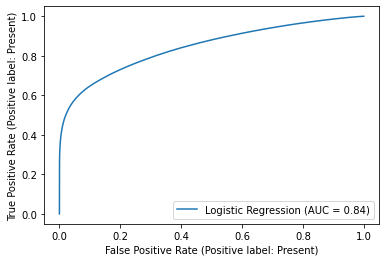

In [35]:
ax = plt.gca()

# Plotting the logistic regression ROC curve
metrics.RocCurveDisplay.from_estimator(grid_lr, X_test, y_test, ax=ax, pos_label='Present', name='Logistic Regression')

plt.show()

## Constructing the Confusion Matrix

Logistic regression confusion matrix

In [36]:
# Using the sklearn confusion_matrix() function to make a confusion matrix for the logstic regression model
ConfusionMatrix_logistic_reg = confusion_matrix(y_test, grid_lr.predict(X_test))
ConfusionMatrix_logistic_reg

array([[832172,  85527],
       [294751, 522549]], dtype=int64)

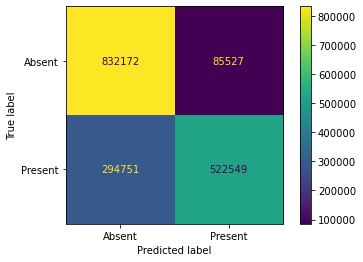

In [37]:
# Visualizing the logistic regression confusion matrix
cmdlr_display = ConfusionMatrixDisplay(ConfusionMatrix_logistic_reg, display_labels=['Absent','Present'])
cmdlr_display.plot()

## Making a classification report

In [38]:
from sklearn.metrics import classification_report

Classification report for logistic regression model

In [39]:
print(classification_report(y_test, grid_lr.predict(X_test)))

              precision    recall  f1-score   support

      Absent       0.74      0.91      0.81    917699
     Present       0.86      0.64      0.73    817300

    accuracy                           0.78   1734999
   macro avg       0.80      0.77      0.77   1734999
weighted avg       0.80      0.78      0.78   1734999

